# Primer parcial de Laboratorio de Datos

16 de octubre de 2024

----


**ANTES DE EMPEZAR**

El parcial consiste en 3 problemas independientes, cada uno con varios items.

1. Hacer una copia de este Colab en tu drive.
2. Leer todo el parcial antes de comenzar.
3. Comenzar a resolver lo que consideren mas simple ...
4. ... pero mantener en la entrega el orden de los problemas y los items.
5. Indicar en cada punto cual es la propuesta para resolverlo, luego la implementación y a continuación cualquier comentario relevante acerca del resultado.

> *Ejemplo:*
>
> Para generar la columna `C`,
> necesito para cada fila información de las columnas `A` y `B`,
> por lo que tengo que usar `df.apply(func, axis="columns")`
> que aplica a cada fila la función `func`.
> Para cada fila, si `A` es par y `B` es impar, la `func` devuelve...

6. El notebook debe correr de forma autónoma, bajando automáticamente los archivos, sin necesidad de operación del usuario ni usando programas externos (excel, word, notepad, etc). Sin embargo, podés usar lo que necesites para indagar el formato de un archivo o cualquier cosa que necesites.
7. Podes utilizar **cualquier** recurso disponible, **excepto** la comunicación con tus compañeros/as.
8. El examen termina a las 18 hrs.

**ANTES DE ENTREGAR**:

1.   Releer.
2.   Verificar que TODO el codigo corra.

**PARA ENTREGAR**:

1. Se realiza a través del campus en el mismo lugar donde encontraste el link para este colab.
2. Bajar en colab el archivo `.ipynb` (`File` > `Download` > `Download .ipynb`) y subirlo al campus.
3. Compartir el colab (`Share`, opción `Anyone with link` y `Commenter`, `Copy link`) copiando el link el campus.



## Problema 1: nombres en la ciudad

El gobierno de la Ciudad de Buenos Aires publica el Listado de nombres inscriptos en el Registro Civil (nombres usados) y listado de nombres aprobados por el Registro Civil hasta la derogación de la ley 18248 por parte del Código Civil y Comercial vigente desde 2015 (nombres permitidos).

https://data.buenosaires.gob.ar/dataset/nombres

En los puntos 2, 3, 4, 5 y 7 pone una breve explicación de la estrategia para obtener el resultado deseado antes del código.

### 1. Bajá los datos de **nombres permitidos** e importalos a un pandas dataframe.

In [1]:
#Lectura y analisis
import numpy as np
import pandas as pd

#Graficado y representacion
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
from shapely.geometry import Point
import scipy
import scipy.stats as stats




In [2]:
url='https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-gobierno/nombres/nombres-permitidos.csv'
df=pd.read_csv(url,sep=";") #si pones None, lo detecta solo
df


,NOMBRE,SEXO,ORIGEN,SIGNIFICADO
0,AARON,M,S/O,S/S
1,AARONIT,M,S/O,S/S
2,ABA,F,S/O,S/S
3,ABACO,M,S/O,S/S
4,ABALEN,M,S/O,S/S
...,...,...,...,...
9812,ZUNILDA,F,S/O,S/S
9813,ZURIEL,A,S/O,S/S
9814,ZUZA,F,S/O,S/S
9815,ZUZANNY,F,S/O,S/S


### 2. Encontrá la cantidad de nombres por sexo.

In [3]:
#primero chequemos los valores de la columna sexo
df.SEXO.unique()

array(['M', 'F', 'A'], dtype=object)

In [4]:
#chequeamos los nombres correspondientes a la categoria "A"
df[df["SEXO"]=="A"]["NOMBRE"].unique()

array(['ABI', 'ACAÑIR', 'ACNIN', 'AFIF', 'AFRICA', 'AGATE', 'AIAD',
       'AIEN', 'AIKE', 'AIN', 'AINAO', 'AKARI', 'AKILAH', 'AKILINA',
       'ALCOTT', 'ALE', 'ALEN', 'ALEY', 'ALHUECHE', 'ALIAN', 'ALIHUEN',
       'ALUEN', 'ALUHE', 'ALUNEY', 'ALVA', 'AMAIKE', 'AMANI', 'AMANKAYA',
       'AMARU', 'AMBAY', 'AMI', 'AMOR', 'ANAEL', 'ANAKIN', 'ANAT',
       'ANDRAS', 'ANDREA', 'ANIL', 'ANISI', 'ANOEL', 'ANSLEY', 'ANTI',
       'ANTU', 'ARA', 'ARAI', 'ARAMI', 'ARAMIL', 'ARANDU', 'ARE', 'AREL',
       'AREV', 'ARGE', 'ARGYROULA', 'ARJUNA', 'ARUNI', 'ASCENSION',
       'ASHLAN', 'ASHLEY', 'ATZIN', 'AUCAN', 'AUGUSTINE', 'AUKI', 'AVI',
       'AYERAI', 'AYLEN', 'AYRAMPU', 'AYREN', 'AYUN', 'BALLARD', 'BAY',
       'BELEN', 'BELL', 'BEN HUR', 'BERJUHI', 'BERYL', 'BEVERLY', 'BEVIN',
       'BLAIR', 'BLAKE', 'BO', 'BRAZIL', 'BRILANE', 'BRIT', 'BRITAIN',
       'BRYNN', 'CALFU', 'CAMIL', 'CARLIN', 'CARMEL', 'CARMIN', 'CARY',
       'CASEY', 'CHARLIE', 'CHARLOT', 'CHEYENNE', 'CHRIS', 'CIELO',
      

In [5]:
#si asumimos que los nombres marcados con "A" son permitidos para ambos sexos luego
nombres_masculinos=df[(df['SEXO']=="M") | (df["SEXO"]=="A")] #filtramos el df por sexo
nombres_femeninos=df[(df["SEXO"]=="F") | (df["SEXO"]=="A")]
print(f"la cantidad de nombres masculinos es {nombres_masculinos.NOMBRE.count()}")
print(f"la cantidad de nombres femeninos es {nombres_femeninos.NOMBRE.count()}") #estamos contando todos los valores distintos de Nan


la cantidad de nombres masculinos es 5463
la cantidad de nombres femeninos es 4837


In [6]:
#si solo contamos los marcados com F y H

In [6]:
nombres_masculinos_=df[df["SEXO"]=="M"]
nombres_femeninos_=df[df["SEXO"]=="F"]
print(f"la cant de nombres masculinos es {nombres_masculinos_.NOMBRE.count()}")
print(f"la cant de nombres femeninos es {nombres_femeninos_.NOMBRE.count()}")


la cant de nombres masculinos es 4980
la cant de nombres femeninos es 4354


In [7]:
#chequeamos la cant de nan, " " y nombres con A para ver si los numeros son coherentes
print(df["NOMBRE"].isnull().sum())
print(df["SEXO"].isnull().sum())
print((df["NOMBRE"] == "").sum())
df[df["SEXO"]=="A"]["NOMBRE"].count()
print(4980+483)
print(4352+483)

0
0
0
5463
4835


### 3. Agrega una columna "largo" que contenga el largo de cada nombre.

(Con largo, nos referimos a la cantidad de caracteres. Pueden incluir espacios como parte del largo para nombres compuestos.)


In [13]:
#hacemos todos los cambios en una copia del df
#usamos len para determinar el largo de la palabra
#usamos map para definir la nueva columna
#aplicamos len a cada nombre y lo cargamos a la columna
df_copia=df.copy()
df_copia["LARGO"]=df_copia.NOMBRE.map(len)
#breve discusion sobre apply, map , agg y transform
#apply, le pasas una funcion y una axis (default o) y actua sobre todas las columnas o filas(axis=1), te devuelve el dataframe modificado
#By default (result_type=None)
#agg solo sirve para "aggregating" type operations (tipo mean, median, asi, operaciones q resumen los datos)
#transform solo "transforma"


In [14]:
df_copia

,NOMBRE,SEXO,ORIGEN,SIGNIFICADO,LARGO
0,AARON,M,S/O,S/S,5
1,AARONIT,M,S/O,S/S,7
2,ABA,F,S/O,S/S,3
3,ABACO,M,S/O,S/S,5
4,ABALEN,M,S/O,S/S,6
...,...,...,...,...,...
9812,ZUNILDA,F,S/O,S/S,7
9813,ZURIEL,A,S/O,S/S,6
9814,ZUZA,F,S/O,S/S,4
9815,ZUZANNY,F,S/O,S/S,7


### 4. Encontrá los nombres (sin distinguir entre simples o compuestos) más cortos y más largos para cada sexo.


In [11]:
df_copia.groupby("SEXO").describe() #veo la descripcion estadistica por sexo y uso el max y min de largo para ver los nombres

LARGO                                              
       count      mean       std  min  25%  50%  75%   max
SEXO                                                      
A      483.0  5.585921  1.876467  2.0  5.0  5.0  6.0  20.0
F     4354.0  6.308911  1.953015  2.0  5.0  6.0  7.0  20.0
M     4980.0  6.363052  1.786990  2.0  5.0  6.0  7.0  20.0

In [11]:
nombres_mas_cortos_m=df_copia[(df_copia["LARGO"]==2) & (df_copia["SEXO"]=="M")]["NOMBRE"].values
nombres_mas_largos_m=df_copia[(df_copia["LARGO"]==20) & (df_copia["SEXO"]=="M")]["NOMBRE"].values
nombres_mas_cortos_f=df_copia[(df_copia["LARGO"]==2) & (df_copia["SEXO"]=="F")]["NOMBRE"].values
nombres_mas_largos_f=df_copia[(df_copia["LARGO"]==20) & (df_copia["SEXO"]=="F")]["NOMBRE"].values
print(f"los nombres mas cortos masculinos son {nombres_mas_cortos_m}")
print(f"los nombres mas cortos femeninos son {nombres_mas_cortos_f}")
print(f"los nombres mas largos masculinos son {nombres_mas_largos_m}")
print(f"los nombres mas largos femeninos son {nombres_mas_largos_f}") #no estoy contando los de a

los nombres mas cortos masculinos son ['AL' 'HO' 'OG' 'TY' 'YU']
los nombres mas cortos femeninos son ['AN' 'FE' 'IA' 'YA']
los nombres mas largos masculinos son ['FRANCISCO COLMENARIO']
los nombres mas largos femeninos son ['CAMILA DE LA CARIDAD' 'MARIA D.L.CONCEPCION' 'MARIA D.T.LOS SANTOS'
 'MARIA DE LA ALMUDENA' 'MARIA DE LA MACARENA' 'MARIA DE LAS ERMITAS'
 'MARIA DE LAS GRACIAS' 'MARIA DEL MONTSERRAT' 'MARIA DELOS MILAGROS'
 'SILVINA DL GUADALUPE']


### 5. ¿Cuál es el largo más común? Poné algunos ejemplos.


In [12]:
df_copia["LARGO"].value_counts()
#el largo más comun es 6

,count
LARGO,
6,2404
5,2166
7,1836
8,1167
4,1059
9,561
3,235
10,199
11,72


In [13]:
#ejemplos
df_copia[df_copia["LARGO"]==6]["NOMBRE"]

,NOMBRE
4,ABALEN
7,ABBOTT
9,ABDALA
14,ABDIAS
15,ABDIEL
...,...
9802,ZOTICO
9804,ZUBAIR
9808,ZULEMA
9809,ZULIMA


### 6. Hacé un histograma de largo, coloreado por sexo.


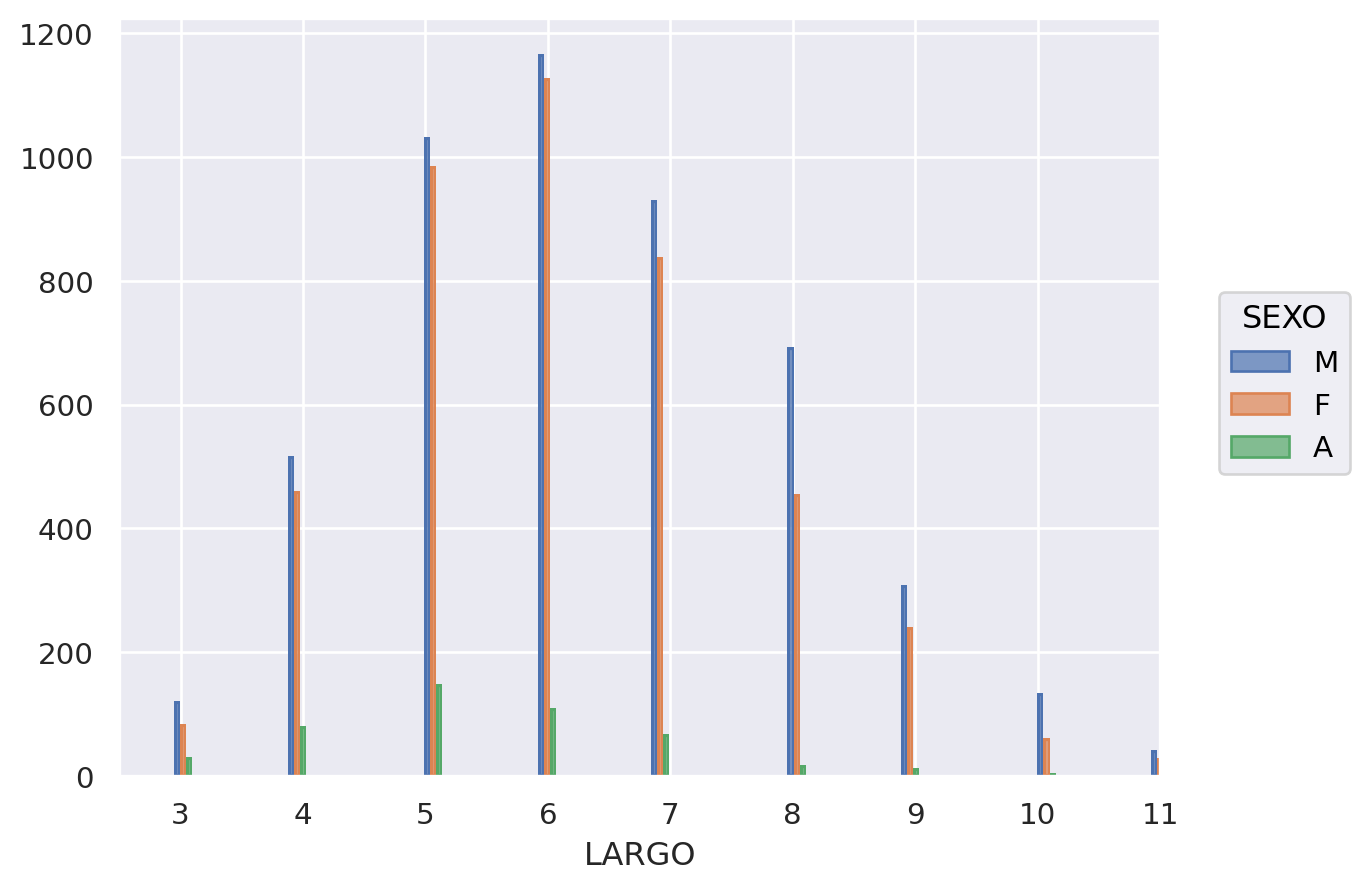

In [14]:
(
    so.Plot(df_copia, x="LARGO", color="SEXO")
    .add(so.Bar(), so.Hist(), so.Dodge())
    .limit(x=(2.5, 11))
)
#esto hay que mejorarlo

### 7. **BONUS**: elimina los nombres compuestos y repeti el punto 4.

In [18]:
#estos si llego los hago
df_filtrado = df_copia[df_copia["NOMBRE"].apply(lambda x: len(x.split()) == 1)]
df_filtrado.groupby("SEXO").describe()

LARGO                                              
       count      mean       std  min  25%  50%  75%   max
SEXO                                                      
A      465.0  5.389247  1.393138  2.0  5.0  5.0  6.0  11.0
F     4270.0  6.154098  1.532089  2.0  5.0  6.0  7.0  12.0
M     4953.0  6.324248  1.677879  2.0  5.0  6.0  7.0  15.0

In [19]:
nombres_mas_cortos_m=df_filtrado[(df_filtrado["LARGO"]==2) & (df_filtrado["SEXO"]=="M")]["NOMBRE"].values
nombres_mas_largos_m=df_filtrado[(df_filtrado["LARGO"]==15) & (df_filtrado["SEXO"]=="M")]["NOMBRE"].values
nombres_mas_cortos_f=df_filtrado[(df_filtrado["LARGO"]==2) & (df_filtrado["SEXO"]=="F")]["NOMBRE"].values
nombres_mas_largos_f=df_filtrado[(df_filtrado["LARGO"]==12) & (df_filtrado["SEXO"]=="F")]["NOMBRE"].values
print(f"los nombres mas cortos masculinos son {nombres_mas_cortos_m}")
print(f"los nombres mas cortos femeninos son {nombres_mas_cortos_f}")
print(f"los nombres mas largos masculinos son {nombres_mas_largos_m}")
print(f"los nombres mas largos femeninos son {nombres_mas_largos_f}") #no estoy contando los de a

los nombres mas cortos masculinos son ['AL' 'HO' 'OG' 'TY' 'YU']
los nombres mas cortos femeninos son ['AN' 'FE' 'IA' 'YA']
los nombres mas largos masculinos son ['CESARAUGUSTANUS']
los nombres mas largos femeninos son ['BURGUNDOFARA' 'CLITEMNESTRA' 'CRESCENCIANA' 'FRANCAMARINA'
 'HERMENEGILDA' 'PERSEVERANDA' 'PURIFICACION' 'SCHEHEREZADA']


## Problema 2: tratando de reproducir a Chequeado

> La Universidad Pública Nacional hoy no le sirve a nadie más que a los hijos de los ricos y a los de la clase media alta
>
> – Javier Milei, en la presentación del Palacio Libertad.

Para evaluar esta afirmación,
en una nota de [Chequeado](https://chequeado.com/ultimas-noticias/javier-milei-en-la-presentacion-del-palacio-libertad-la-universidad-publica-nacional-hoy-no-le-sirve-a-nadie-mas-que-a-los-hijos-de-los-ricos-y-a-los-de-la-clase-media-alta/)
analizan la proporción de estudiantes que van a la universidad pública según el nivel de ingresos.
Para ello,
utilizan el dataset de la [Encuesta Permanente de Hogares](https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos).
Pueden descargarlo pre-filtrado y en formato Parquet (que es compatible con Pandas) desde acá:
`http://users.df.uba.ar/maurosilber/eph_individual_T124.parquet`

En este ejercicio,
vamos a tratar de reproducir el gráfico de dicha nota.
Puede haber diferencias.

*Nota: decil 12 es la categoría que le asignaron a los que no contestaban sobre sus ingresos.*

### 1. Bajá los datos de nombres permitidos e importalos a un pandas dataframe.


In [16]:
url= 'http://users.df.uba.ar/maurosilber/eph_individual_T124.parquet'
df=pd.read_parquet(url)
df

,edad,asistencia,gestion,nivel,decil
0,44,"No asiste, pero asistió",Ns/Nc,Secundario,12
1,22,"No asiste, pero asistió",Ns/Nc,Universitario,12
2,3,"Sí, asiste",público,Jardín/preescolar,12
3,54,"No asiste, pero asistió",Ns/Nc,Secundario,6
4,53,"No asiste, pero asistió",Ns/Nc,Secundario,6
...,...,...,...,...,...
46045,43,"No asiste, pero asistió",Ns/Nc,Secundario,12
46046,21,"Sí, asiste",público,Secundario,12
46047,20,"Sí, asiste",público,Secundario,12
46048,11,"Sí, asiste",público,Secundario,12


### 2. Para cada columna categórica, describir las categorías posibles.


In [17]:
print(df["asistencia"].unique())
print(df["gestion"].unique())
print(df["nivel"].unique())
print(df["decil"].unique())

['No asiste, pero asistió', 'Sí, asiste', 'Ns/Nc', 'Nunca asistió']
Categories (4, object): ['No asiste, pero asistió', 'Ns/Nc', 'Nunca asistió', 'Sí, asiste']
['Ns/Nc', 'público', 'privado']
Categories (3, object): ['Ns/Nc', 'privado', 'público']
['Secundario', 'Universitario', 'Jardín/preescolar', 'Primario', 'Terciario', 'Ns/Nc', 'Educación especial (discapacitado)', 'EGB', 'Polimodal', 'Posgrado universitario']
Categories (10, object): ['EGB', 'Educación especial (discapacitado)',
                          'Jardín/preescolar', 'Ns/Nc', ..., 'Primario', 'Secundario', 'Terciario',
                          'Universitario']
<IntegerArray>
[12, 6, 2, 9, 5, 3, 8, 4, 7, 10, 0, 1]
Length: 12, dtype: Int8


### 3. Añadir la columna `universidad` con las siguientes categorias:

- `publica`: si es universitario y asíste a una universidad pública,
- `privada`: si es universitario y asíste a una universidad privada,
- `desconocida`: si es universitario pero no contestó si es pública o privada,
- `ninguna`: si no es universitario.

In [18]:
df_copia=df.copy() #yo lo hago con si asiste o asistio que se yo
def clasificacion(nivel, gestion):
  if nivel=="Universitario":
    if gestion=="público":
      return "publica"
    elif gestion=="privado":
      return "privada"
    else:
      return "desconocida"
  else:
    return "ninguna"
df_copia["universidad"]=df_copia.apply(lambda row: clasificacion(row["nivel"], row["gestion"]), axis=1) #aplico la funcion por fila
df_copia

,edad,asistencia,gestion,nivel,decil,universidad
0,44,"No asiste, pero asistió",Ns/Nc,Secundario,12,ninguna
1,22,"No asiste, pero asistió",Ns/Nc,Universitario,12,desconocida
2,3,"Sí, asiste",público,Jardín/preescolar,12,ninguna
3,54,"No asiste, pero asistió",Ns/Nc,Secundario,6,ninguna
4,53,"No asiste, pero asistió",Ns/Nc,Secundario,6,ninguna
...,...,...,...,...,...,...
46045,43,"No asiste, pero asistió",Ns/Nc,Secundario,12,ninguna
46046,21,"Sí, asiste",público,Secundario,12,ninguna
46047,20,"Sí, asiste",público,Secundario,12,ninguna
46048,11,"Sí, asiste",público,Secundario,12,ninguna


In [19]:
df_copia.universidad.unique()

array(['ninguna', 'desconocida', 'publica', 'privada'], dtype=object)

### 4. Generar un nuevo DataFrame seleccionando el rango de edad de 18 a 25 años (inclusive).


In [20]:
df_copia_18_25=df_copia[(df_copia["edad"]>=18) & (df_copia["edad"]<=25)]
df_copia_18_25.edad.unique()

array([22, 25, 24, 19, 23, 20, 21, 18])

### 5. Hacer un gráfico de barras mostrando cuantas personas hay en cada categoría de `universidad`.


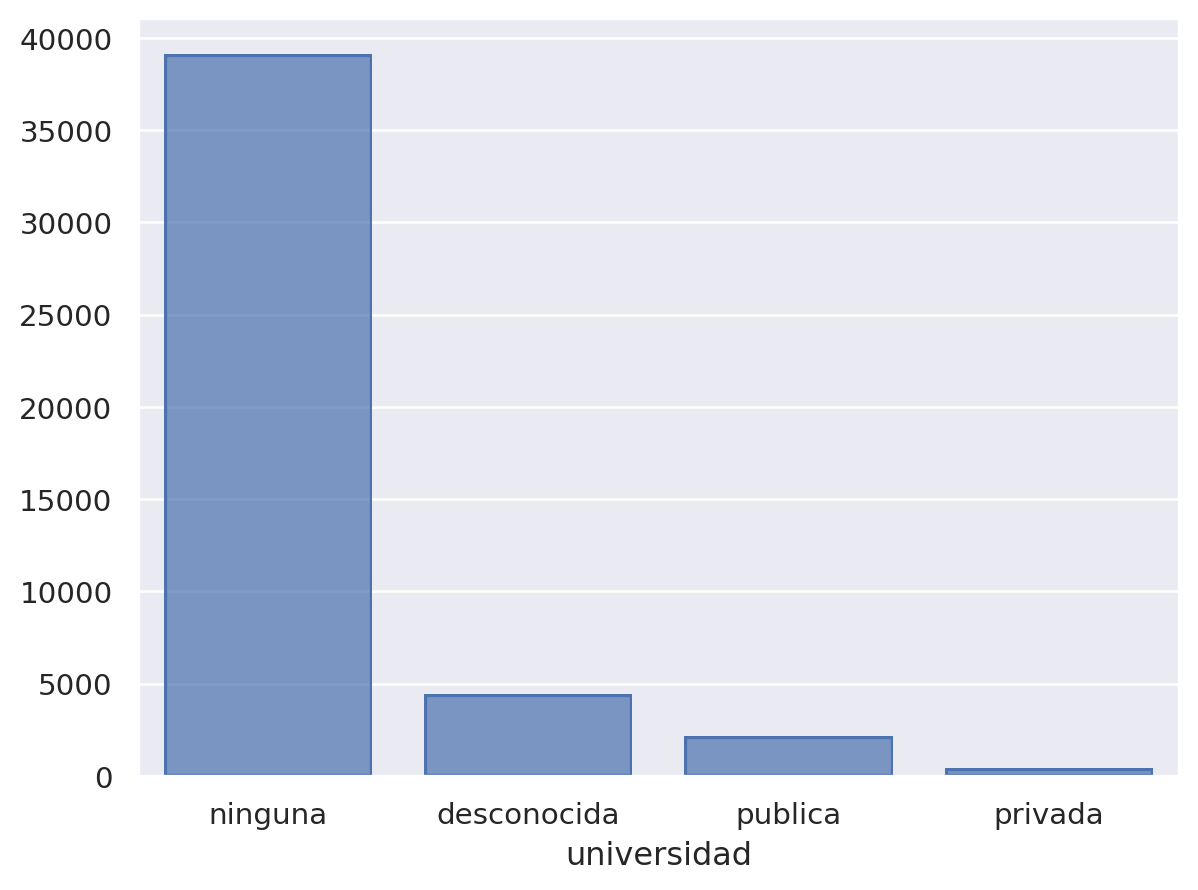

In [21]:
(so.Plot(df_copia, x="universidad")
    .add(so.Bar(), so.Hist(), so.Dodge())
)

### 6. Hacer un gráfico de barras apliladas (*e**stack**eadas*) por universidad, en función del decil de ingresos.


In [22]:
#vuelvo despues

### 7. Generar un DataFrame con la cantidad de personas por decil y universidad.


In [23]:
df_nuevo=df_copia.groupby(["decil", "universidad"]).size().reset_index(name="cantidad")
df_nuevo

,decil,universidad,cantidad
0,0,desconocida,14
1,0,ninguna,117
2,0,privada,3
3,0,publica,12
4,1,desconocida,79
5,1,ninguna,4645
6,1,privada,12
7,1,publica,155
8,2,desconocida,138
9,2,ninguna,4873


### 8. Añadir una columna `porcentaje_por_decil`, donde se *normaliza* la cantidad de personas (calculada en el punto anterior) al total que hay en ese decil.


In [24]:
df_nuevo["porcentaje_por_decil"]=df_nuevo.apply(lambda row: row["cantidad"]/df_nuevo[df_nuevo["decil"]==row["decil"]]["cantidad"].sum(), axis=1)
df_nuevo

,decil,universidad,cantidad,porcentaje_por_decil
0,0,desconocida,14,0.095890
1,0,ninguna,117,0.801370
2,0,privada,3,0.020548
3,0,publica,12,0.082192
4,1,desconocida,79,0.016152
5,1,ninguna,4645,0.949704
6,1,privada,12,0.002453
7,1,publica,155,0.031691
8,2,desconocida,138,0.026176
9,2,ninguna,4873,0.924317


### 9. Para cada universidad en un subgráfico distinto, hacer un gráfico de barras de `porcentaje_por_decil` en función del decil. Además, que los subgráficos no compartan (*share*) el eje `porcentaje_por_decil`.

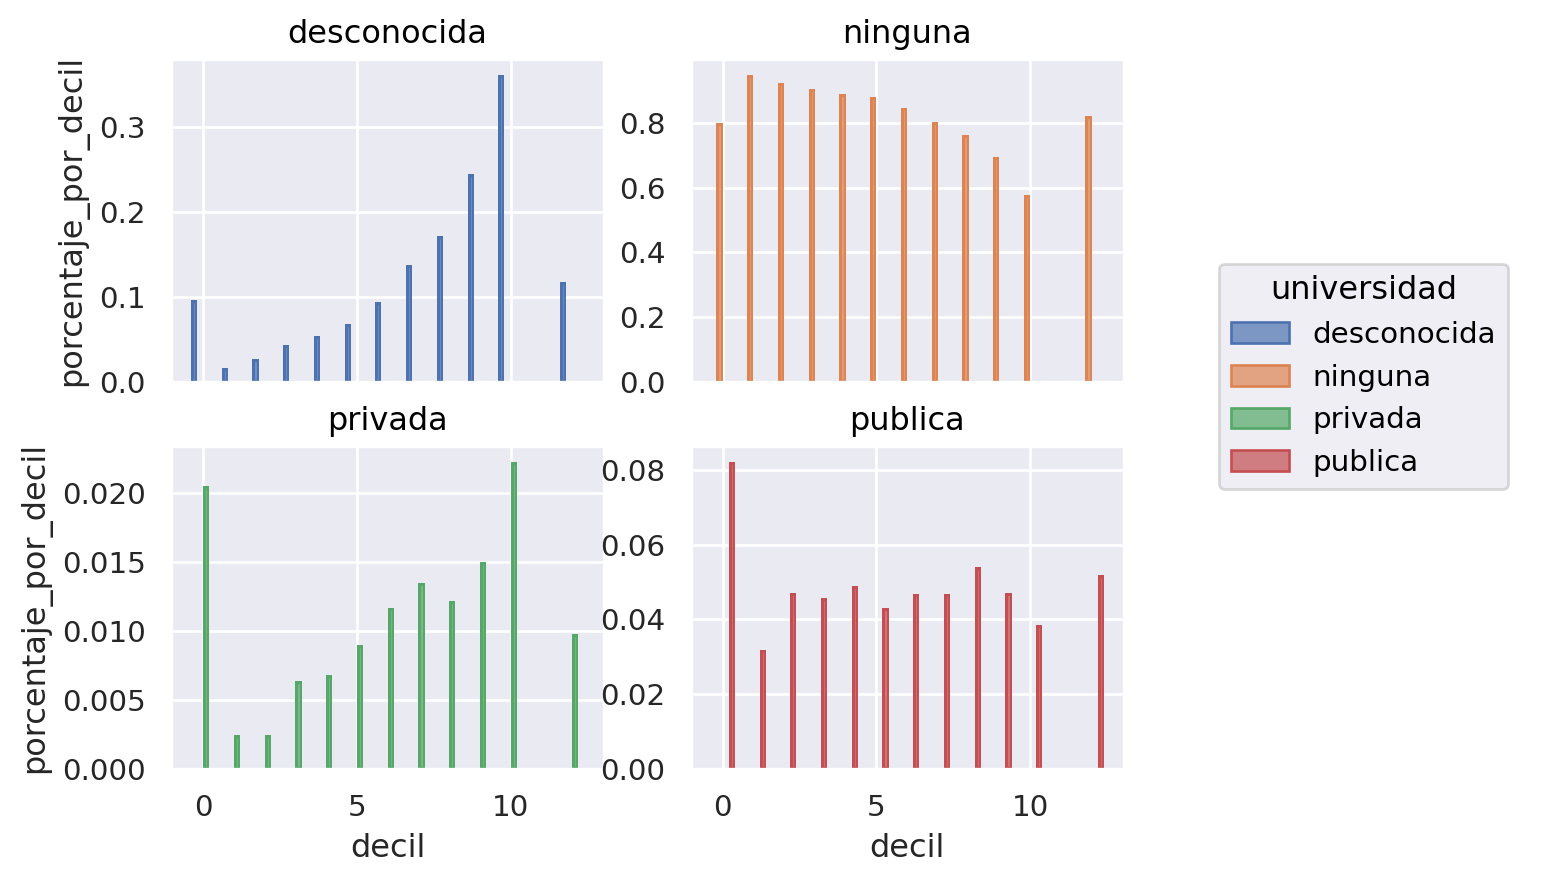

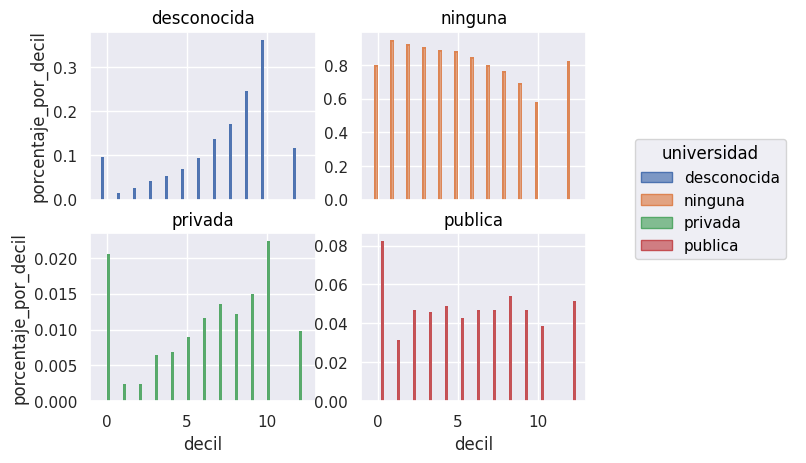

In [25]:
f=plt.figure()
p=(so.Plot(df_nuevo, x="decil", y="porcentaje_por_decil", color="universidad")
.facet("universidad",wrap=2).share(y=False)
.add(so.Bar(), so.Dodge())

) #capaz estaria bueno q sean un poco más grandes. Se podria hacer unsando matplotlib quizas
p.on(f) #revisar porque se plotea dos veces

## Problema 3: espacio verde

El gobierno de la Ciudad de Buenos Aires publica los Límites y ubicación geográfica de los espacios verdes de la Ciudad (jardín, parque, patio recreativo, plaza, plazoleta, cantero y polideportivo).
La persona que hizo ese archivo **ODIA** a la comunidad de datos abiertos en general,
y a los estudiantes de Laboratorio de Datos en particular.
Por eso motivo, hizo especialmente dificil leer la columna de fecha.

https://data.buenosaires.gob.ar/dataset/espacios-verdes

### 1. Bajá los datos de "Espacio Verde Público" e importalos a un pandas dataframe.


In [26]:
url='https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/espacios-verdes/espacio_verde_publico.csv'
df=pd.read_csv(url)
df

,id,nombre,nom_mapa,barrio,comuna,ubicacion,clasificac,tiene_pati,apadrinada,decreto,fecha_decr,ordenanza_,fecha_orde,boletin_of,fecha_bole,area,perimetro,observacio,geometry
0,1442,NaN,NaN,Villa Urquiza,12,NaN,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.332974,185.793518,Digitalizado por USIG en Agosto de 2015 - Cant...,POLYGON ((-58.49150207266336 -34.5759953540672...
1,1443,NaN,NaN,Villa Urquiza,12,NaN,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.593536,183.701278,Digitalizado por USIG en Agosto de 2015 - Cant...,POLYGON ((-58.490401619722974 -34.575387900733...
2,1444,Jardín Japonés,Jardín Japonés,Palermo,14,"DEL LIBERTADOR, AV. - SARMIENTO, AV. - BERRO, ...",PLAZA,SI,NO,2.833,30/11/1989,43.927,1989-09-11,18.679,1989-12-13,13216.567085,3283.857360,DIFERENTES NOMBRES - Redigitalización en Agost...,MULTIPOLYGON (((-58.40932624744171 -34.5756881...
3,1445,Plaza Sicilia,Pza. Sicilia,Palermo,14,"DEL LIBERTADOR, AV. - SARMIENTO, AV. - BERRO, ...",PLAZA,SI,NO,2.833,30/11/1989,43.927,1989-09-11,18.679,1989-12-13,96633.332061,8260.718105,DIFERENTES NOMBRES - Redigitalización en Agost...,MULTIPOLYGON (((-58.41118016551363 -34.5757493...
4,1446,NaN,NaN,Villa Soldati,8,NaN,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337.704941,399.457430,Digitalizado por USIG en Septiembre de 2015,POLYGON ((-58.454623092075494 -34.655655651825...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,2383,NaN,NaN,Parque Patricios,4,AV BRASIL entre COMBATE DE LOS POZOS y AV PICH...,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.298730,103.297628,Agregado según info provista por DG Reg Urbana...,MULTIPOLYGON (((-58.39528079323495 -34.6302004...
2140,2382,NaN,NaN,Parque Patricios,4,AV BRASIL entre AV JUJUY y CATAMARCA,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.830107,22.611674,Agregado según info provista por DG Reg Urbana...,POLYGON ((-58.401211606036604 -34.631866893133...
2141,2381,NaN,NaN,Parque Patricios,4,AV BRASIL entre LA RIOJA y GRAL URQUIZA,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.205042,12.544116,Agregado según info provista por DG Reg Urbana...,POLYGON ((-58.40651939384915 -34.6338692033484...
2142,2384,NaN,NaN,Parque Patricios,4,AV CHICLANA entre LA RIOJA y GRAL URQUIZA,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.318767,51.149765,Agregado según info provista por DG Reg Urbana...,"POLYGON ((-58.40707061962485 -34.630982792369,..."


### 2. Leer la columna `fecha_decr` del archivo `.csv` y mostrar las primeras 5 filas.


In [27]:
df.fecha_decr.head()

,fecha_decr
0,NaN
1,NaN
2,30/11/1989
3,30/11/1989
4,NaN


### 3. Contar los diferentes formatos de fecha presentes.

Ejemplos de formato: [`DD/MM/YY`, `DD-MM-YYYY`]

In [28]:
import re

# Lista de columnas de fechas
columnas_fecha = ["fecha_bole", "fecha_orde", "fecha_decr"]

# Función para detectar formato
def detectar_formato(fecha):
    if pd.isna(fecha):  # Si es NaN, devolver NaN
        return np.nan
    fecha = str(fecha)  # Convertir a string para evitar errores con valores nulos
    if re.match(r"\d{2}/\d{2}/\d{4}", fecha):
        return "DD/MM/YYYY"
    elif re.match(r"\d{4}-\d{2}-\d{2}", fecha):
        return "YYYY-MM-DD"
    elif re.match(r"\d{2}-\d{2}-\d{4}", fecha):
        return "DD-MM-YYYY"
    elif re.match(r"\d{4}/\d{2}/\d{2}", fecha):
        return "YYYY/MM/DD"

    else:
        return "Otro"
for col in columnas_fecha:
    df[f"formato_{col}"] = df[col].apply(detectar_formato)
    print(f"Formato de fecha en la columna '{col}': {df[f'formato_{col}'].unique()}")



Formato de fecha en la columna 'fecha_bole': [nan 'YYYY-MM-DD']
Formato de fecha en la columna 'fecha_orde': [nan 'YYYY-MM-DD']
Formato de fecha en la columna 'fecha_decr': [nan 'DD/MM/YYYY' 'Otro']


In [29]:
df[df["formato_fecha_decr"]=="Otro"]["fecha_decr"].unique()

array(['1975', '2/10/2002', '08-11-44', '08-01-96', '26-11-97',
       '13/111940', '26-01-50', '02/011992', '05/011996', '19-10-09',
       '29/121927'], dtype=object)

### 4. Convertir la mayor cantidad de elementos posible de esta columa a tipo `datetime`.

In [30]:
#convirtamos la columna fecha_decr a una columna de tipo datetime
#necesitamos formatos compatibles con todatetime()
from datetime import date
#tengo que modificar los "otro" y medio que despues estas, no son tantos.
